군집 평가

ㅁ 군집이 얼마나 잘 형성되었는지에 대한 평가
- 군집간 분산 최대화
- 군집 내 분산 최소화

ㅁ 레이블이 없고, 몇 개의 군집이 적절한지 알 수 없어 지도학습의 평가 방법으로 평가하기 어려움
- EX) {a,b,c,d} 정답:{0,0,1,1} 예측:{1,1,0,0}
        
ㅁ 타겟값이 있는 경우
- RI/ARI
- NMI/AMI

ㅁ 타겟값이 없는 경우
- 군집 타당성 지표
- 군집간 거리, 군집의 지름, 군집의 분산
- 실루엣 계수 : 클러스터 밀집정도 계산
    

ARI (adjusted rand index)

- RI를 군집의 크기를 고려하여 조정
- 클러스터 수가 증가해도 값이 증가하지 않는다.
- (-1 ~ 1) 사이값


Silhouette Coefficient (실루엣 코피시언트)

- 타겟값이 없는 경우
- 클러스터의 밀집도 계산
- 1에 가까울수록 좋은 값
- 원형 클러스터일수록 좋은 값 -> 복잡한 모양일 때 잘 맞지 않음.


In [8]:
#한글을 출력하기 위한 import
#한글 font를 설정해준다.

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname ="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font',family=font_name)

import matplotlib as mpl # -깨짐 현상을 해결하기 위햏 matplotlib을 import
mpl.rcParams['axes.unicode_minus'] = False # - 깨짐 현상을 해결하기 위한 구문



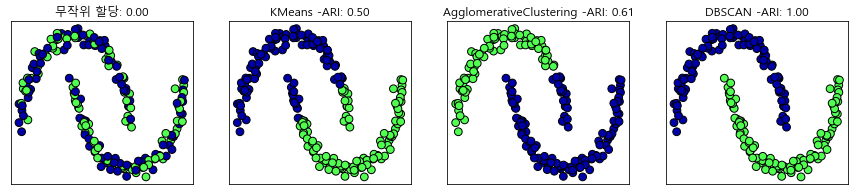

In [18]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import numpy as np
import mglearn
from sklearn.cluster import KMeans
from sklearn.metrics.cluster import adjusted_rand_score
#moon 데이터를 저장한다.
X, y= make_moons(n_samples = 200, noise =0.05, random_state = 0)

#데이터 전처리를 위해 StandardScaler 를 저장한다.
#평균이 0, 분산이 1이 되도록 스케일을 조정함.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#4개의 그래프를 그리기 위해 subplot를 그린다.
fig, axes = plt.subplots(1, 4, figsize = (15, 3), subplot_kw={'xticks':(), 'yticks':()})

#무작위 할당을 위해 random_state값을 설정해준다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low = 0, high = 2, size=len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters,
               cmap = mglearn.cm3, s =60, edgecolors='black')

#무작위 할당했을 떄 실루엣스코어를 출력해준다.
axes[0].set_title('무작위 할당: {:.2f}'.format(
                    adjusted_rand_score(y,random_clusters)))

#알고리즘 kmeans, agglomerative, dbscan 을 저장한다. 
#클러스터 설정은 각2개로 한다.
algorithms = [KMeans(n_clusters =2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

#위에서 저장한 알고리즘을 이용해 나머지 3개의 그래프를 그린다.
# 제목 옆에 실루엣 스코어를 출력해준다.
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3,
              s = 60, edgecolors='black')
    ax.set_title("{} -ARI: {:.2f}".format(algorithm.__class__.__name__,
                                    adjusted_rand_score(y,clusters)))



!!! 타겟값을 알고 있을 때
(adjusted_rand_score)


ㅁ 무작위 할당
- 클러스터를 아예 맞추지 못한것을 확인할 수 있다.

ㅁ KMeans
- 0.5의 값을 얻었는데 클러스트를 절반만 맞췄다고 할 수 있다.

ㅁ Agglomerative
- 0.61의 값으로 kmeans보다 약간 더 높은 점수를 받았다.

ㅁ DBSCAN
- 1의 값으로 완벽하게 군집을 알아냈다.

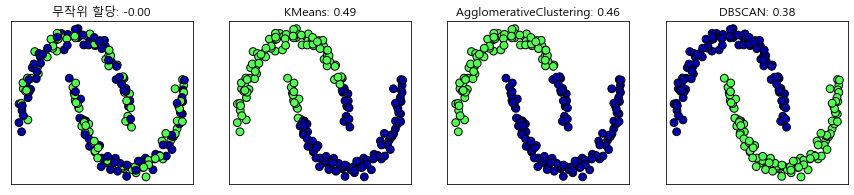

In [16]:

#moon 데이터를 저장한다.
X, y= make_moons(n_samples = 200, noise =0.05, random_state = 0)

#데이터 전처리를 위해 StandardScaler 를 저장한다.
#평균이 0, 분산이 1이 되도록 스케일을 조정함.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

#4개의 그래프를 그리기 위해 subplot를 그린다.
fig, axes = plt.subplots(1, 4, figsize = (15, 3), subplot_kw={'xticks':(), 'yticks':()})

#무작위 할당을 위해 random_state값을 설정해준다.
random_state = np.random.RandomState(seed=0)
random_clusters = random_state.randint(low = 0, high = 2, size=len(X))

axes[0].scatter(X_scaled[:,0], X_scaled[:,1], c=random_clusters,
               cmap = mglearn.cm3, s =60, edgecolors='black')

#무작위 할당했을 떄 실루엣스코어를 출력해준다.
axes[0].set_title('무작위 할당: {:.2f}'.format(
                        silhouette_score(X_scaled, random_clusters)))

#알고리즘 kmeans, agglomerative, dbscan 을 저장한다. 
#클러스터 설정은 각2개로 한다.
algorithms = [KMeans(n_clusters =2), AgglomerativeClustering(n_clusters=2),DBSCAN()]

#위에서 저장한 알고리즘을 이용해 나머지 3개의 그래프를 그린다.
# 제목 옆에 실루엣 스코어를 출력해준다.
for ax, algorithm in zip(axes[1:], algorithms):
    clusters = algorithm.fit_predict(X_scaled)
    
    ax.scatter(X_scaled[:,0], X_scaled[:,1], c=clusters, cmap=mglearn.cm3,
              s = 60, edgecolors='black')
    ax.set_title("{}: {:.2f}".format(algorithm.__class__.__name__,
                                    silhouette_score(X_scaled, clusters)))



!!! 타겟값이 없을 때
실루엣(silhouette_score) 계수
- 클러스터의 밀집정도 계산/ 높을수록 좋으며 최대 1
- 모양이 복잡할 때는 밀집 정도를 평가하는 것이 잘 맞지 않음
- -1: 잘못된 군집, 0 : 중첩된 군집 , 1: 가장 좋은 군집

ㅁ 군집 모델이 매우 안정적이거나 실루엣 점수가 높다고 하더라도, 군집에
어떤 유의미한 것이 있는지 또는 데이터의 흥미로운 면을 반영하고 있는지는 알 수 없음

-----------------------------------------------------

요약

ㅁ K-means, DBSCAN, 병합군집
- 대량의 데이터셋 적용가능
- 이해 및 구현이 쉽다

ㅁ K-means : 클러스터 개수 지정 필요
- 클러스터 중심으로 클러스터 구분
- 백터 양자화(분해방법): 데이터 포인트를 클러스터 중심으로 표현

ㅁ DBSCAN: eps로 클러스터 크기 간접 조정
- 클러스터 개수 자동 조정
- 잡음포인트 인식가능
- 클러스터 모양인식
- 크기가 다른 클러스터 생성(장점 또는 단점)

ㅁ 병합군집 : 덴더그램으로 분할 계층도 생성
